In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs=64

In [0]:
path=untar_data(URLs.CIFAR_100);path

PosixPath('/root/.fastai/data/cifar100')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/cifar100/test'),
 PosixPath('/root/.fastai/data/cifar100/train')]

In [0]:
path_annon=path
path_images=path/'train/aquatic_mammals/whale'

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.png$'

In [0]:
fnames = get_image_files(path_images)
fnames[:5]

[PosixPath('/root/.fastai/data/cifar100/train/aquatic_mammals/whale/balaenoptera_borealis_s_000043.png'),
 PosixPath('/root/.fastai/data/cifar100/train/aquatic_mammals/whale/right_whale_s_000164.png'),
 PosixPath('/root/.fastai/data/cifar100/train/aquatic_mammals/whale/whale_s_000338.png'),
 PosixPath('/root/.fastai/data/cifar100/train/aquatic_mammals/whale/fin_whale_s_001671.png'),
 PosixPath('/root/.fastai/data/cifar100/train/aquatic_mammals/whale/rorqual_s_000841.png')]

In [0]:
data = ImageDataBunch.from_name_re(path_images, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
finback_whale_s
  if getattr(ds, 'warn', False): warn(ds.warn)


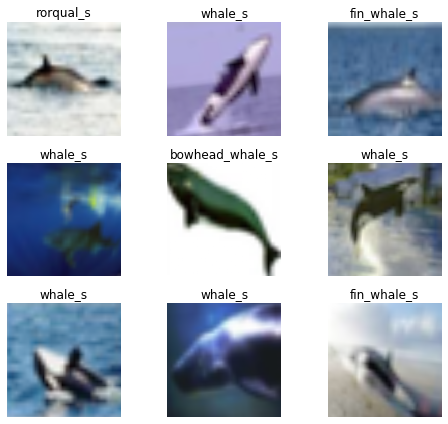

In [0]:
data.show_batch(rows=3, figsize=(7,6))


In [0]:
print(data.classes)
len(data.classes),data.c

['balaena_mysticetus_s', 'balaenoptera_acutorostrata_s', 'balaenoptera_borealis_s', 'balaenoptera_physalus_s', 'baleen_whale_s', 'blue_whale_s', 'bowhead_s', 'bowhead_whale_s', 'fin_whale_s', 'finback_s', 'greenland_whale_s', 'humpback_s', 'minke_whale_s', 'right_whale_s', 'rorqual_s', 'sei_whale_s', 'whale_s']


(17, 17)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.model


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,4.210976,3.561024,0.858586,00:03
1,3.700687,3.232607,0.797980,00:02
2,3.262615,3.075583,0.747475,00:02
3,2.963087,3.033229,0.727273,00:02


In [0]:
learn.save('stage-1')


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

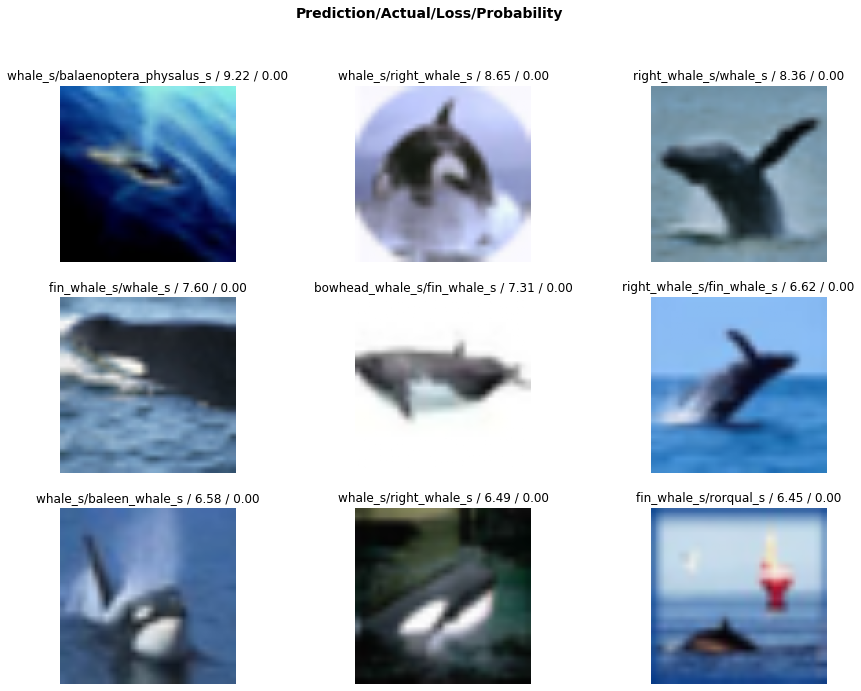

In [0]:
interp.plot_top_losses(9, figsize=(15,11))


In [0]:
doc(interp.plot_top_losses)


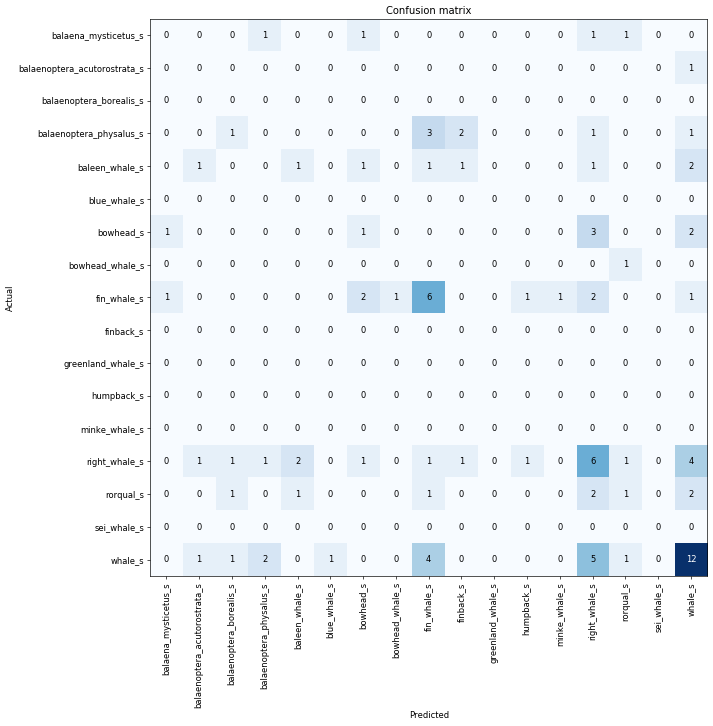

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


In [0]:
interp.most_confused(min_val=2)


[('whale_s', 'right_whale_s', 5),
 ('right_whale_s', 'whale_s', 4),
 ('whale_s', 'fin_whale_s', 4),
 ('balaenoptera_physalus_s', 'fin_whale_s', 3),
 ('bowhead_s', 'right_whale_s', 3),
 ('balaenoptera_physalus_s', 'finback_s', 2),
 ('baleen_whale_s', 'whale_s', 2),
 ('bowhead_s', 'whale_s', 2),
 ('fin_whale_s', 'bowhead_s', 2),
 ('fin_whale_s', 'right_whale_s', 2),
 ('right_whale_s', 'baleen_whale_s', 2),
 ('rorqual_s', 'right_whale_s', 2),
 ('rorqual_s', 'whale_s', 2),
 ('whale_s', 'balaenoptera_physalus_s', 2)]

In [0]:
learn.unfreeze()


In [0]:
learn.fit_one_cycle(1)


epoch,train_loss,valid_loss,error_rate,time
0,2.561134,2.949698,0.616162,00:03


In [0]:
learn.load('stage-1');


In [0]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


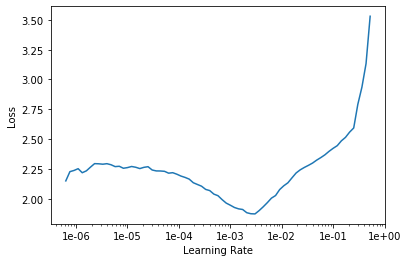

In [0]:
learn.recorder.plot()


In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,2.232615,3.027512,0.747475,00:02
1,2.183348,2.978621,0.727273,00:03


Resnet 50


In [0]:
data = ImageDataBunch.from_name_re(path_images, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
blue_whale_s, sei_whale_s
  if getattr(ds, 'warn', False): warn(ds.warn)


In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


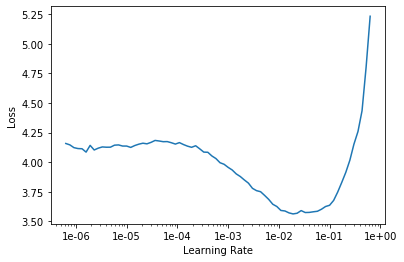

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,4.098189,2.912395,0.804124,00:06
1,3.546353,3.203199,0.731959,00:04
2,3.132836,3.410061,0.659794,00:05
3,2.735673,3.424102,0.659794,00:05
4,2.394774,3.170836,0.649485,00:05
5,2.138813,3.136877,0.659794,00:05
6,1.938555,3.068617,0.659794,00:05
7,1.779123,3.053977,0.659794,00:05


In [0]:
learn.save('stage-1-50')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.324620,2.993618,0.670103,00:06
1,1.210098,2.954125,0.680412,00:05
2,1.221901,2.955055,0.670103,00:05
